In [26]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# The `solutions_univ.py` is a Python file available in the Notebook server that contains solution to the TO DO tasks.
# The solution to each task is present in a separate function in the `solutions_univ.py` file. 
# Do not refer to the file untill you attempt to write code yourself. 
from solutions_univ import bar_chart_solution_1, bar_chart_solution_2

In [27]:
def pp(data):
    print(data, '\n')
    
pokemon = pd.read_csv('./pokemon.csv')
pokemon.head()



,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### sb.countplot takes the whole DataFrame and shows a count of one column's values ###

### sb.barplot, takes x and y axis ###

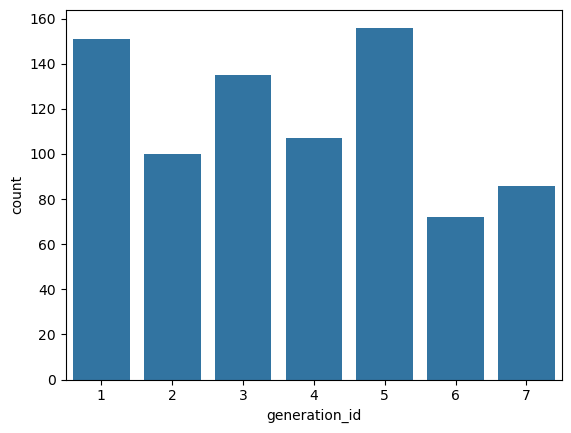

In [28]:
sb.countplot(pokemon, x='generation_id') 
plt.show()

In [29]:
pkmn_types = pokemon.melt(id_vars = ['id','species'], 
                          value_vars = ['type_1', 'type_2'], 
                          var_name = 'type_level', value_name = 'type').dropna()
pkmn_types.head()

,id,species,type_level,type
0,1,bulbasaur,type_1,grass
1,2,ivysaur,type_1,grass
2,3,venusaur,type_1,grass
3,4,charmander,type_1,fire
4,5,charmeleon,type_1,fire


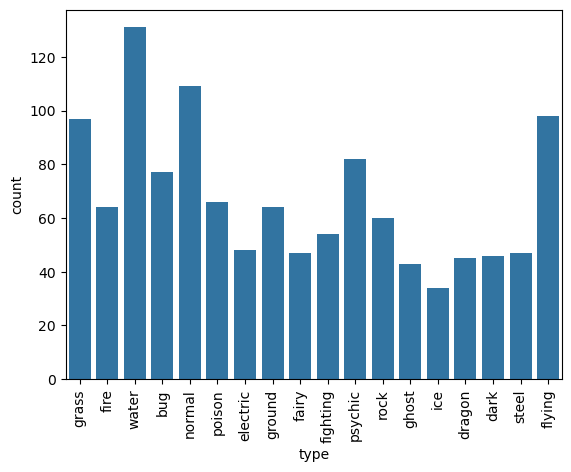

In [30]:
sb.countplot(pkmn_types, x='type')

plt.xticks(rotation=90)
plt.show()

In [31]:
type_counts = pkmn_types['type'].value_counts()
print(type_counts)

n_pokemon = pkmn_types['type'].value_counts().sum()


type
water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
ground       64
fire         64
rock         60
fighting     54
electric     48
fairy        47
steel        47
dark         46
dragon       45
ghost        43
ice          34
Name: count, dtype: int64


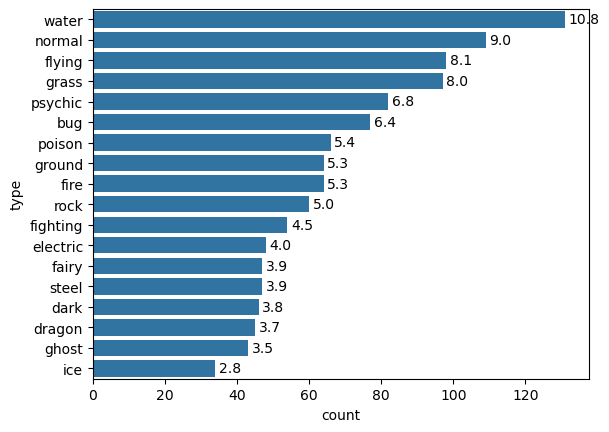

In [34]:
type_order = type_counts.index

sb.countplot(data=pkmn_types, y='type', order=type_order);

# Logic to print the proportion text on the bars
for i in range (type_counts.shape[0]):
    
    count = type_counts.iloc[i]

    # Convert count into a percentage, and then into string
    pct_string = '{:0.1f}'.format(100*count/n_pokemon)

    # Print the string value on the bar. 
    # Read more about the arguments of text() function [here](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html)
    plt.text(count+1, i, pct_string, va='center')

plt.show()